## PyCDA Tutorial

This tutorial is intended to help non-coders make crater detections using PyCDA. For more advanced python users, check out [the official documentation](http://pycda.readthedocs.io/en/latest/start.html) and/or [this demo notebook](https://github.com/AlliedToasters/PyCDA/blob/master/demo.ipynb). <br><br>
By following the steps in this tutorial, you can make crater detections on your very own computer!

## Getting Started with Python and Conda

If you're new to Python altogether, the fastest way to get started (and the approach we’ll take in this tutorial) is by installing Conda on your computer.
The recommended version of conda for this tutorial is Anaconda. Anaconda comes with python and a lot of extra features. <br><br>Go to [this page](https://www.anaconda.com/download/), select your operating system, and download the Python 3.6 version. Follow the steps to install Anaconda on your system; for additional help with getting up and running with Anaconda, check out [this great tutorial for installing Anaconda on Windows](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) or [this tutorial for installing Anaconda on MacOS](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072).

### Building your Crater Detection Environment
Although not strictly necessary, I highly recommend creating a dedicated conda environment to install pycda. Open your Anaconda prompt and type:<br>

`conda create --name craters python=3.6`<br>

This creates an environment on your system called "craters." Next, activate your "craters" environment:

`source activate craters` (MacOS and Linux)<br>
`activate craters` (Windows)

Now that your environment is activated, install pycda with:

`pip install pycda`

Pip will take care of the rest for you. Once it's downloaded and installed, you're ready to go! You can test your installation with:

```python
python
Python 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import pycda
>>>
```

If this works, you've successfuly install PyCDA!

## Open Up a Jupyter Notebook

Jupyter is a python application that allows you to execute python code and visualize results in very easy-to-use interface. Best of all, it comes with Anaconda, so in the above installation process, you should have installed Jupyter as well! Open a notebook by going to your Anaconda prompt and typing:

`jupyter notebook`

You should see some output in the console; if you've never run a notebook before, you may need to copy and paste the link that appears. Otherwise, it should automatically open a tab in your browser. From the Jupyter menu, click on the tab on the upper-right corner called "new" and select "Python 3" from the drop-down menu. This will open up a new notebook.

![](https://github.com/AlliedToasters/crater_demo/raw/master/jupyter_output.png)


## Import PyCDA

Use the following code to import pycda:

In [1]:
import pycda

## Load an Image
For the convenience of demonstrations, this early release of PyCDA comes with some images included. These are the image names:

```
holdout_tile.pgm
rgb_sample.jpg
mercury.png
selection0.png
selection2.png
selection3.png
selection4.png
selection5.png
```

For this demonstration, we'll be using the default sample image, holdout_tile.pgm. To load it, use the following code. This will also display the image.

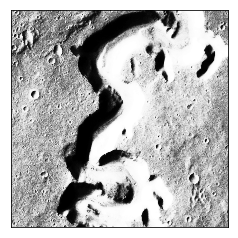

In [2]:
from pycda.sample_data import get_sample_image

image = get_sample_image()
image.show()

This assigns the image to the python object named "image" and displays it in your notebook.<br><br>
Next, create a crater detection pipeline. This command loads the crater detection models, so it may take a few moments to execute. Ignore any warnings; these are harmless outputs from the Keras package, which runs in the background to make detections. <br><br>
We'll call it "cda."

In [3]:
cda = pycda.CDA()

/home/alliedtoasters/miniconda3/envs/dev1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Now we're ready to detect! Use this command to get a list of detections from cda. The process takes some time, and if you'd like to monitor its progress you can include the optional "verbose" flag like this:

```python
detections = cda.predict(image, verboose=True)
```

In [4]:
detections = cda.predict(image)

This assigns a list of detections to the "detections" object. You can look at those with:

In [5]:
detections.head(10)

,lat,long,diameter
0,21.0,30.0,44.021252
1,17.0,1165.0,49.789531
2,19.0,1320.0,44.323906
4,22.0,1226.0,48.151523
5,21.0,1680.0,30.298609
6,15.0,856.0,29.207371
10,16.0,310.0,14.755472
11,15.0,821.0,10.217908
12,22.0,1488.0,19.281752
14,24.0,897.0,7.484821


These dimensions are in number of pixels from the image's origin, which is the upper lefthand corner of the image; so, a crater at 'lat' 16 and 'long' 310 with diameter 14.8 is centered at 16 pixels from the top of the image and 310 pixels from the left edge of the image with a diameter of 14.8 pixels. Use the resolution of the image to convert these values to meters.<br>

## Visualizing Detections

To visualize your detections, you'll need to create a prediction object:


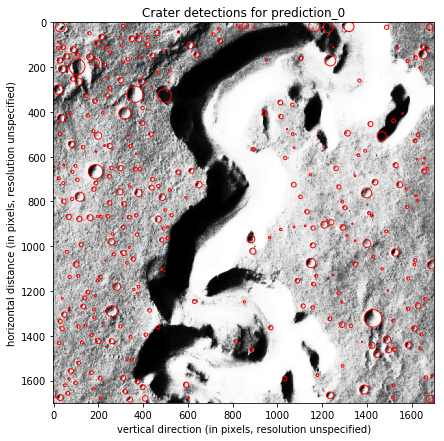

In [6]:
prediction = cda.get_prediction(image)
prediction.show()

This feature simply overlays the information from the list of detection onto the input image so you can see how the predictions look.

## Try Other Images!

Use the built-in image files to try another prediction. To get a specific file, for example the colored Mars image named 'rgb_sample.jpg', use this command:

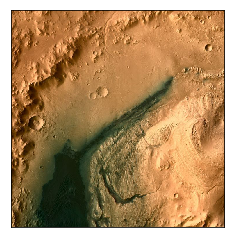

In [7]:
image2 = get_sample_image(filename='rgb_sample.jpg')
image2.show()

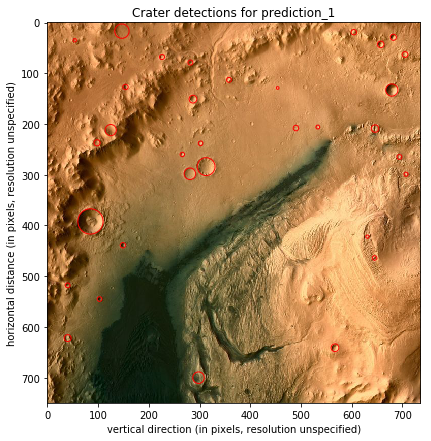

In [8]:
prediction2 = cda.get_prediction(image2)
prediction2.show()

The model was not trained for color images, but it's interesting to see how it does anyway. To get any random image from the samples in the package, use the "choose" argument:

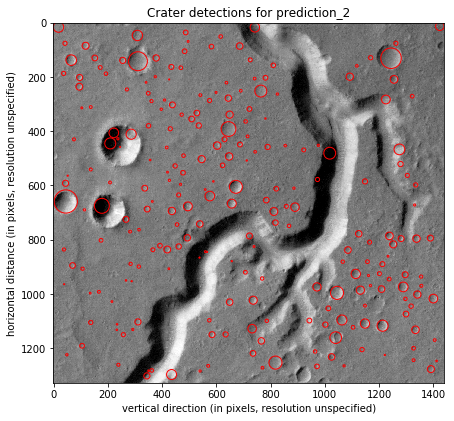

In [9]:
image3 = get_sample_image(choose=True)
prediction3 = cda.get_prediction(image3)
prediction3.show()

## Other Features and Future Improvements for PyCDA

For more features, check out [the demo notebook](https://github.com/AlliedToasters/PyCDA/blob/master/demo.ipynb) and the [official PyCDA documentation](http://pycda.readthedocs.io/en/latest/start.html)!<br><br>
The program is not perfect; in particular, it struggles with lighting conditions not found in the training data and craters that are larger than those found in the training data. These are known problems documented by crater detection research projects, but ongoing work is promising for improving performance in these areas. PyCDA's mission is to keep up with the latest advances in this technology and to make them accessible to all; keep a look out for future updates and improved models!